## 1. Introduction 
- Import dataset: train and test
- Show info data to convert dtype,...
- Describe...

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [82]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [83]:
train_df.set_index("PassengerId", inplace=True)
train_df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [84]:
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")
test_df.head()

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## 2. Feauture Classification: Categorical vs Nummerical 

In [87]:
train_df.Survived = train_df.Survived.astype(dtype="category")
feature_category = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_category(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_category(train_df, feature_category)
convert_category(test_df, feature_category)

In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


### 1.2 Distribution of Numerical feature value across the sample

In [90]:
train_df.describe()

Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

### 1.3 Distribution of Categorical feature

In [91]:
train_df.describe(include="category")

Survived  Pclass   Sex  SibSp  Parch Embarked
count        891     891   891    891    891      889
unique         2       3     2      7      7        3
top            0       3  male      0      0        S
freq         549     491   577    608    678      644

In [92]:
test_df.describe(include="category")

Pclass   Sex  SibSp  Parch Embarked
count      418   418    418    418      418
unique       3     2      7      8        3
top          3  male      0      0        S
freq       218   266    283    324      270

## 3. Exploratory Data Analysis (EDA)
Correlating categorical features

### 3.1 EDA for Categorical features
Target variable: Survived

In [93]:
train_df.Survived.value_counts().to_frame()

count
Survived       
0           549
1           342

In [94]:
train_df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [95]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Visualization for Survival, Sex

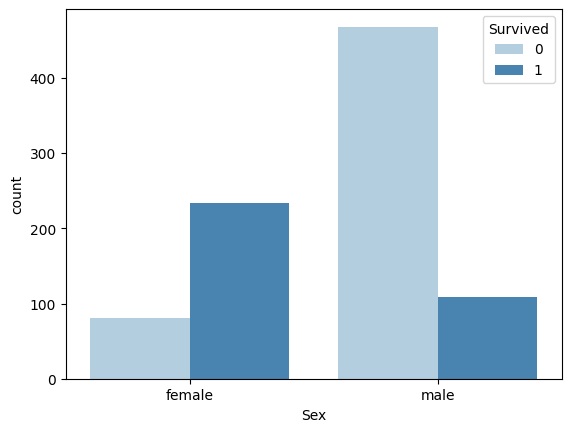

In [96]:
sns.countplot(data=train_df, x="Sex", hue="Survived", palette="Blues");

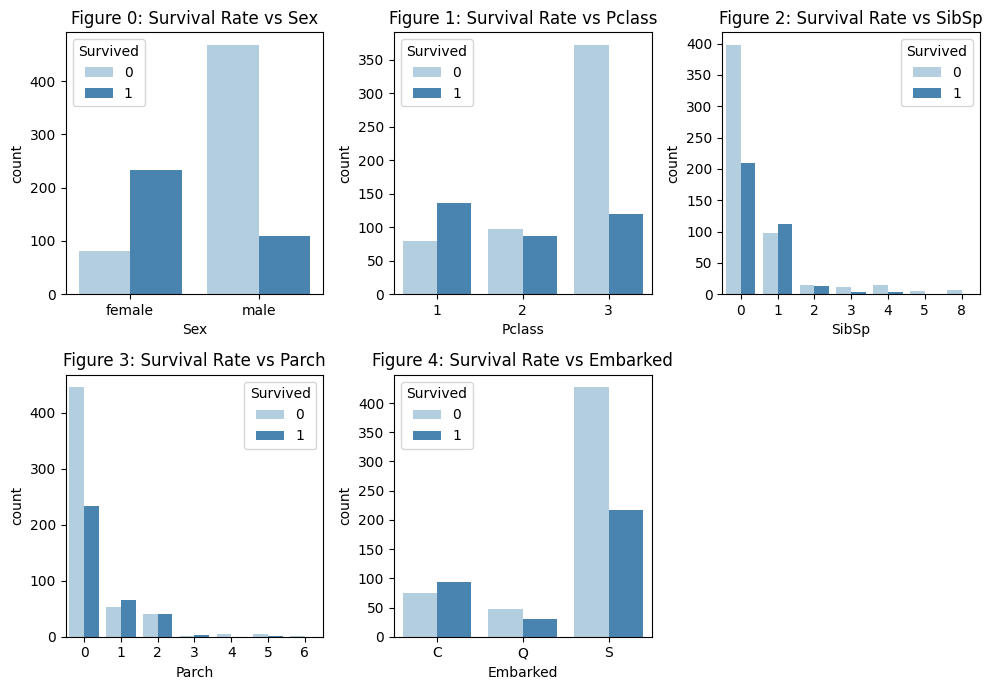

In [97]:
cols = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 7))
for r in range(n_rows):
    for c in range(n_cols):
        i = r *n_cols + c
        ax_i = ax[r,c]
        if i < len(cols):
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i}: Survival Rate vs {cols[i]}")
ax.flat[-1].set_visible(False)
plt.tight_layout()

### 3.2 EDA for Numerical Features

Age

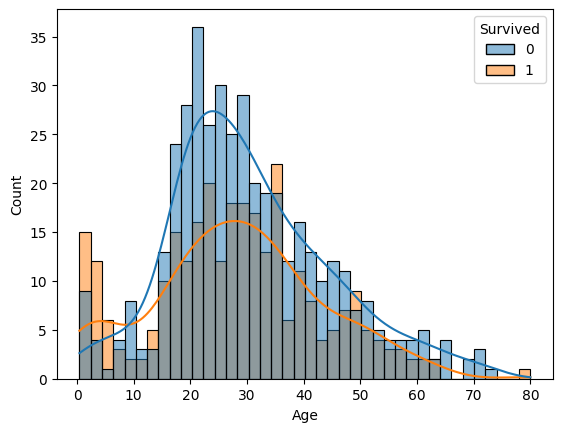

In [98]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins=40, kde=True);

Fare

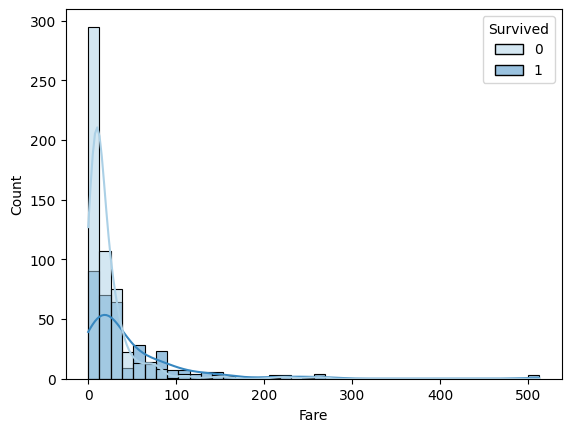

In [99]:
sns.histplot(data=train_df, x="Fare", hue="Survived", bins=40, kde=True, palette="Blues");

In [100]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

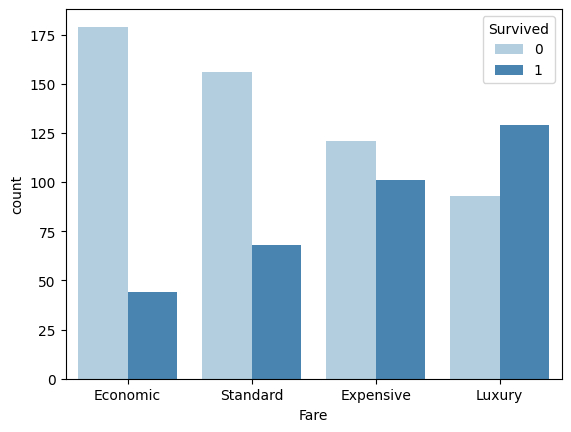

In [101]:
#To Fare for 0-25% quartile, 25-50, 50-75, 75-100
fare_categories = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_data = pd.qcut(train_df.Fare, q=4, labels=fare_categories)
sns.countplot(x=quartile_data, hue=train_df.Survived, palette="Blues");

## 4. Feature Engineering & Data Wrangling
### 4.1 Feature Engineering
Name
- Regular expression

In [102]:
train_df.Name.head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [103]:
import re #regular regression
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df["Title"]=train_df.Name.apply(lambda name: extract_title(name))
test_df["Title"]=test_df.Name.apply(lambda name: extract_title(name))

In [104]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [105]:
def group_title(title):
    if title in ["Mr", "Miss", "Mrs", "Master"]:
        return title
    elif title=="Ms":
        return "Miss"
    else:
        return "Other"
train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))
test_df["Title"]=test_df["Title"].apply(lambda title: group_title(title))

In [106]:
test_df.Title.value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: count, dtype: int64

In [107]:
train_df[train_df.Name.str.contains("Mrs. Martin")].Name

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

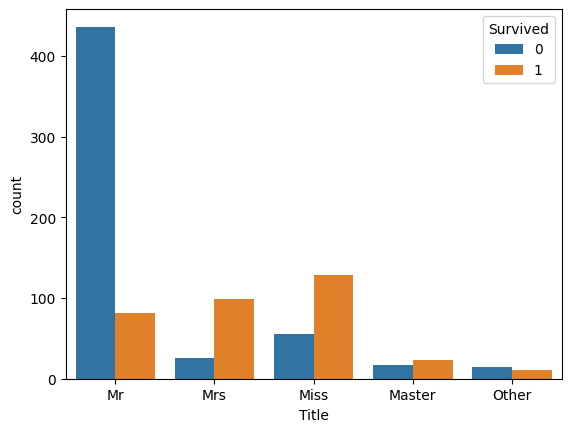

In [108]:
sns.countplot(data=train_df, x="Title", hue="Survived");

Family <br>
`SibSp`, `Parch`: the same feature -> combine 

In [109]:
train_df["Family_size"] = train_df["SibSp"].astype("int") + train_df["Parch"].astype("int") + 1
test_df["Family_size"]= test_df["SibSp"].astype("int") + test_df["Parch"].astype("int") + 1

In [110]:
train_df.Family_size.value_counts()

Family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

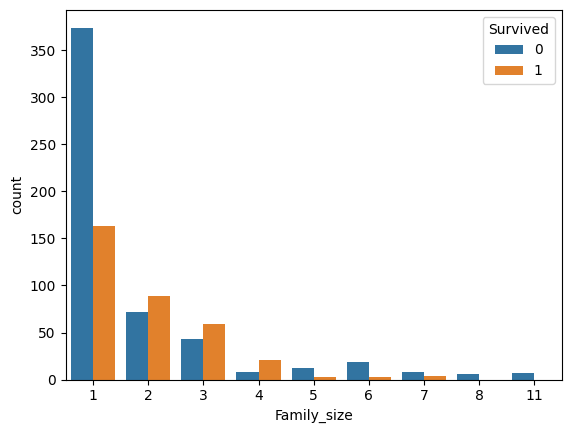

In [111]:
sns.countplot(data=train_df, x="Family_size", hue="Survived");

Combine value family_size to family_cat: `(0, 1]: solo, (1,4]: small, (4, 6]: medium, (6,20]: large family`

In [112]:
train_df["Family_cat"] = pd.cut(train_df.Family_size, bins=[0, 1, 4, 6, 20], labels=["solo", "small", "medium", "large"])
test_df["Family_cat"] = pd.cut(test_df.Family_size, bins=[0, 1, 4, 6, 20], labels=["solo", "small", "medium", "large"])

In [113]:
train_df["Family_cat"].value_counts()

Family_cat
solo      537
small     292
medium     37
large      25
Name: count, dtype: int64

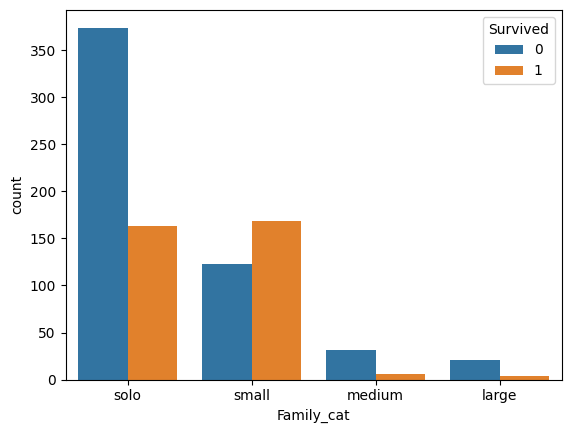

In [114]:
sns.countplot(x="Family_cat", hue="Survived", data=train_df);

### 4.2 Data Wrangling

In [115]:
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Pclass", "Family_cat", "Title", "Embarked"]
col_features = num_features + cat_features
print(col_features)

['Age', 'Fare', 'Sex', 'Pclass', 'Family_cat', 'Title', 'Embarked']


In [116]:
def count_missingvalue(df, features):
    for col in features:
        missing_value = df[col].isna().sum()
        if missing_value > 0:
            print(f"Column {col} have {missing_value} missing value, ({missing_value*100/len(df):.2f}%).")
count_missingvalue(train_df, col_features)
count_missingvalue(test_df, col_features)

Column Age have 177 missing value, (19.87%).
Column Embarked have 2 missing value, (0.22%).
Column Age have 86 missing value, (20.57%).
Column Fare have 1 missing value, (0.24%).


Filling missing value
- Filling missing value with `median` of whole dataset

In [120]:
age_by_sex_pclass = train_df.groupby(["Sex", "Pclass"], observed=False)["Age"].median()

In [121]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [139]:
#Filling the missing value in Age with the median of Sex and Pclass groups
train_df['Age']=train_df.groupby(["Sex", "Pclass"], observed=False)["Age"].transform(lambda x: x.fillna(x.median()))
test_df['Age']=test_df.groupby(["Sex", "Pclass"], observed=False)["Age"].transform(lambda x: x.fillna(x.median()))

In [138]:
count_missingvalue(train_df, col_features)
count_missingvalue(test_df, col_features)

Column Embarked have 2 missing value, (0.22%).
Column Fare have 1 missing value, (0.24%).


In [140]:
# X data and y target
X = train_df[col_features]
y = train_df["Survived"]

In [141]:
X_test=train_df[col_features]

<h4>Preprocess pipeline</h4>

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [144]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [145]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Family_cat', 'Title',
                                  'Embarked'])])

In [146]:
X = preprocessor.transform(X)

In [147]:
X_test = preprocessor.transform(X_test)

In [148]:
# X -> X_train, X_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)